In [2]:
%connect_info

{"key":"7a796939-5ed8-42c6-877a-214bd82ea182","signature_scheme":"hmac-sha256","transport":"tcp","ip":"127.0.0.1","hb_port":9000,"control_port":9001,"shell_port":9002,"stdin_port":9003,"iopub_port":9004,"kernel_name":"python3112jvsc74a57bd04149aa2f31a7f8b5ff184e82bf464dce73529b69401cc2940ad6232b832b4da8"}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-v3c8d184565f98fb2f448257c3f746dd3e618a62eb.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fft
from copy import deepcopy


In [4]:
%load_ext IPython.extensions.autoreload
%autoreload 2

import pywt
import pycwt

from hypyp.fnirs_tools import (
    xwt_coherence_morl,
    smoothing
)
import hypyp.plots
from hypyp.plots import (
    plot_spectrogram_periods,
    spectrogram_plot_period,
)

ninja: error: '/tmp/pip-build-env-tiw5qk87/overlay/bin/cython', needed by 'pywt/_extensions/_cwt.cpython-311-x86_64-linux-gnu.so.p/_cwt.c', missing and no known rule to make it


Loading pywt from /home/patrice/work/ppsp/pywt/pywt
Loading pycwt from /home/patrice/work/ppsp/pycwt/pycwt


## FUNCTION FROM HYPYP

In [5]:
#def spectrogram_plot_period(z, times, frequencies, coif, cmap="viridis", norm=Normalize(), ax=None, colorbar=True):
#    ###########################################################################
#    # plot
#    
#    # set default colormap, if none specified
#    if cmap is None:
#        cmap = cm.get_cmap('Greys')
#    # or if cmap is a string, get the actual object
#    elif isinstance(cmap, str):
#        cmap = plt.colormaps[cmap]
#
#    # create the figure if needed
#    if ax is None:
#        fig, ax = plt.subplots()
#    else:
#        fig = plt.gcf()
#
#    periods = np.log2(5/frequencies)
#
#    ntimes = 5*times
#    
#    xx,yy = np.meshgrid(ntimes,periods)
#    ZZ = z
#    
#    if norm is None:
#        im = ax.pcolor(xx,yy,ZZ, cmap=cmap)
#        ax.plot(ntimes,coif)
#        ax.fill_between(times,coif, step="mid", alpha=0.4)
#    else:
#        im = ax.pcolor(xx,yy,ZZ, norm=norm, cmap=cmap)
#        ax.plot(ntimes,coif)
#        ax.fill_between(times,coif, step="mid", alpha=0.4)
#    
#    if colorbar:
#        cbaxes = inset_axes(ax, width="2%", height="90%", loc=4) 
#        fig.colorbar(im,cax=cbaxes, orientation='vertical')
#
#    ax.set_xlim(ntimes.min(), ntimes.max())
#    ax.set_ylim(periods.min(), periods.max())
#
#    steps = np.arange(0, len(periods), 10)
#    ax.set_yticks(periods[steps], 2**(periods[steps]))
#    
#    ax.invert_yaxis()
#    
#    return ax

## Sine waves

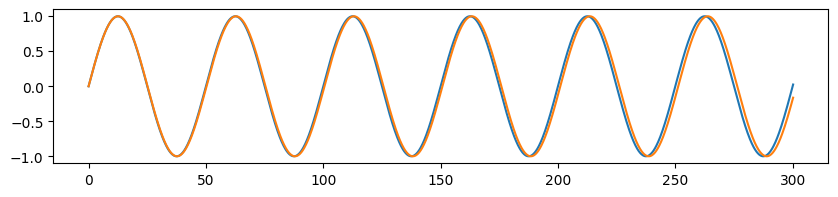

<Figure size 640x480 with 0 Axes>

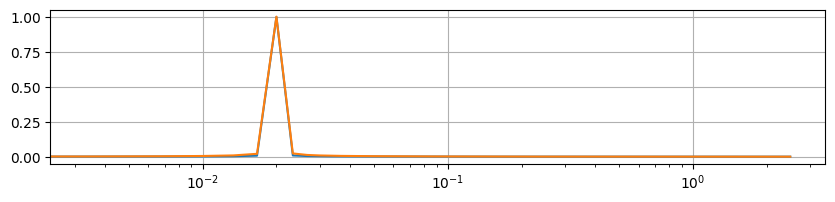

In [217]:
plt.figure(figsize=(10,2))

fs = 5
N = 1501
T = 1.0 / fs
x = np.linspace(0, N/fs, N)

freq1 = 0.02
#freq2 = 0.04
freq2 = 0.02 - 0.0001

y1 = np.sin(x * 2 * np.pi * freq1)
plt.plot(x, y1)

y2 = np.sin(x * 2 * np.pi * freq2)
#sig1_P2 = np.random.randn(*sig1_P2.shape) #np.finfo(float).eps*np.ones(*sig1_P2.shape) 
plt.plot(x, y2)

plt.figure()

plt.figure(figsize=(10,2))
# sample spacing
yf = fft.fft(y1)
xf = fft.fftfreq(N, T)[:N//2]
yf2 = fft.fft(y2)

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf2[0:N//2]))
plt.xscale('log')
plt.grid()
plt.show()

In [228]:
tracer = dict(name='pywt')
wct, times, fq, coif = xwt_coherence_morl(
    y1,
    y2,
    T,
    1/12,
    wavelet_name='cmor2-1',
    normalize=True,
    smoothing_params=dict(smooth_factor=-0.1),
    tracer=tracer
)

#hypyp.plots.plot_line([tracer], 'smoothing_k', 'smoothing_k') 
#plt.pcolormesh(np.abs(tracer['W1']))
#plt.pcolormesh(np.imag(tracer['smoothing_W_fft']))
#plt.show()
#plt.plot(tracer['smoothing_gaus_fft'][:,2])
#plt.show()

#lists for df
#hypyp.plots.plot_coefs([tracer], 'S1', 'S1')
#hypyp.plots.plot_coefs([tracer], 'S2', 'S2')
#hypyp.plots.plot_coefs([tracer], 'W12', 'W12')
spectrogram_plot_period(np.abs(wct), times, fq, coif)
plt.show()



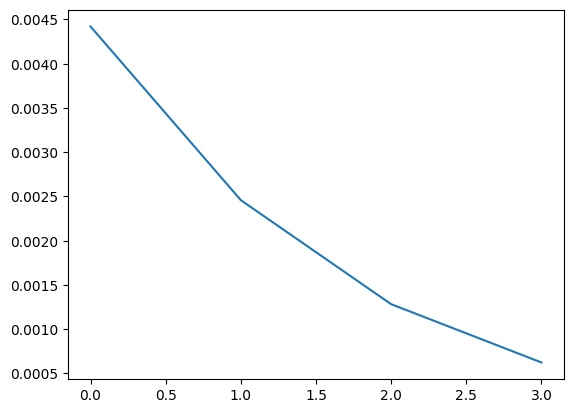

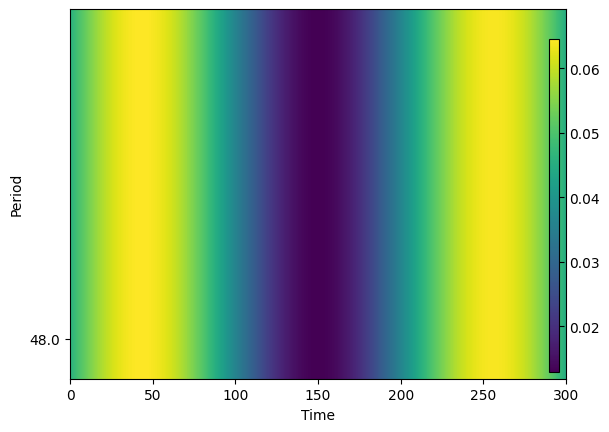

In [174]:
plt.plot(tracer['smoothing_gaus_fft'][:,2])
plt.show()

#lists for df
#hypyp.plots.plot_coefs([tracer], 'S1', 'S1')
#hypyp.plots.plot_coefs([tracer], 'S2', 'S2')
#hypyp.plots.plot_coefs([tracer], 'W12', 'W12')
spectrogram_plot_period(np.abs(wct), times, fq, coif)
plt.show()



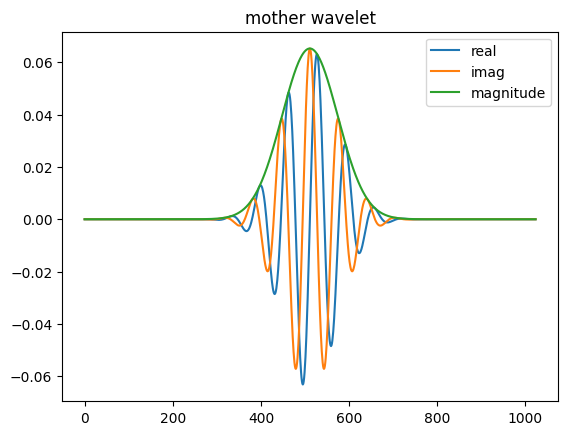

In [175]:


plt.plot(np.real(tracer['int_psi']))
plt.plot(np.imag(tracer['int_psi']))
plt.plot(np.abs(tracer['int_psi']))
plt.legend(['real', 'imag', 'magnitude'])
plt.title('mother wavelet')
plt.show()



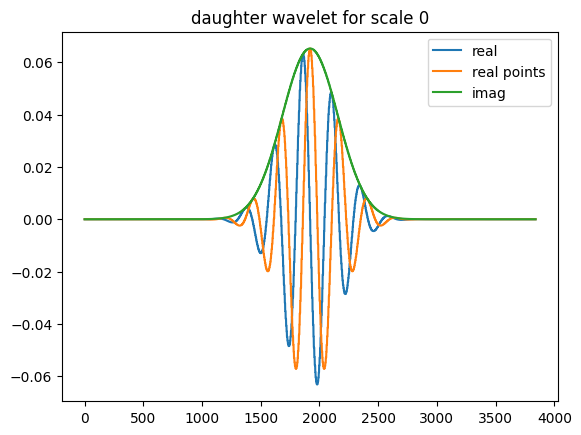

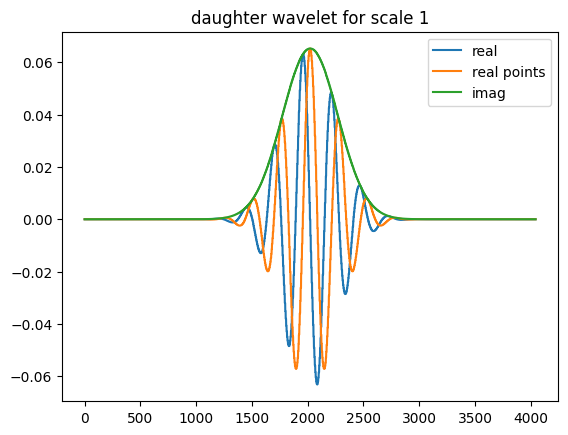

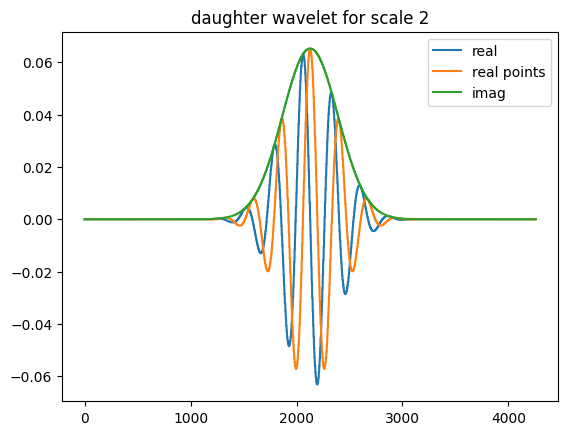

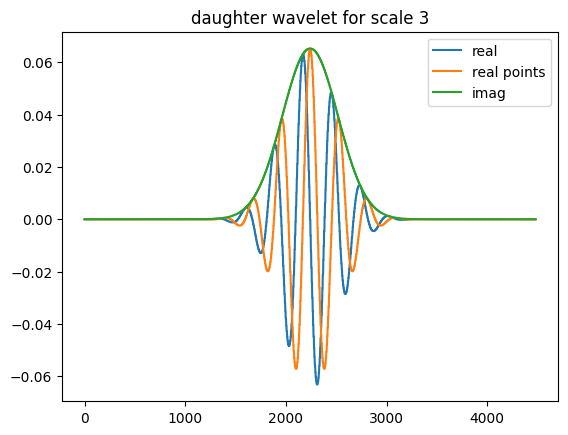

IndexError: list index out of range

In [176]:


for i in list(range(0, 20)) + [-1]:
    plt.plot(np.real(tracer['int_psi_scales'][i]))
    #if i != -1:
    #    plt.scatter(np.arange(0, len(tracer['int_psi_scales'][i])), np.real(tracer['int_psi_scales'][i]))
    plt.plot(np.imag(tracer['int_psi_scales'][i]))
    #if i != -1:
    #    plt.scatter(np.arange(0, len(tracer['int_psi_scales'][i])), np.imag(tracer['int_psi_scales'][i]))
    plt.plot(np.abs(tracer['int_psi_scales'][i]))
    plt.legend(['real', 'real points', 'imag', 'imag points', 'magnitude'])
    plt.title(f"daughter wavelet for scale {i}")
    plt.show()



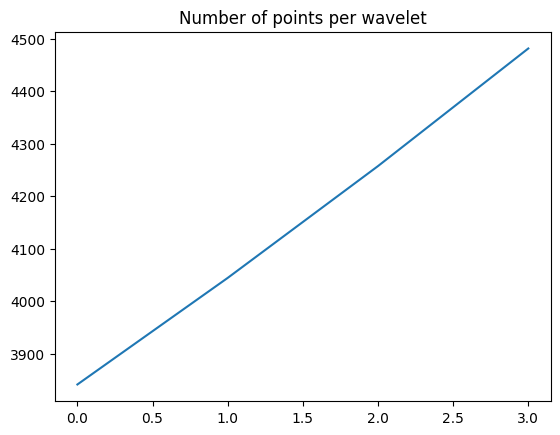

In [177]:


# number of points per wavelet
j_sizes = [len(tracer['js'][i]) for i in np.arange(len(tracer['js']))]
plt.plot(j_sizes)
plt.title(f"Number of points per wavelet")
plt.show()


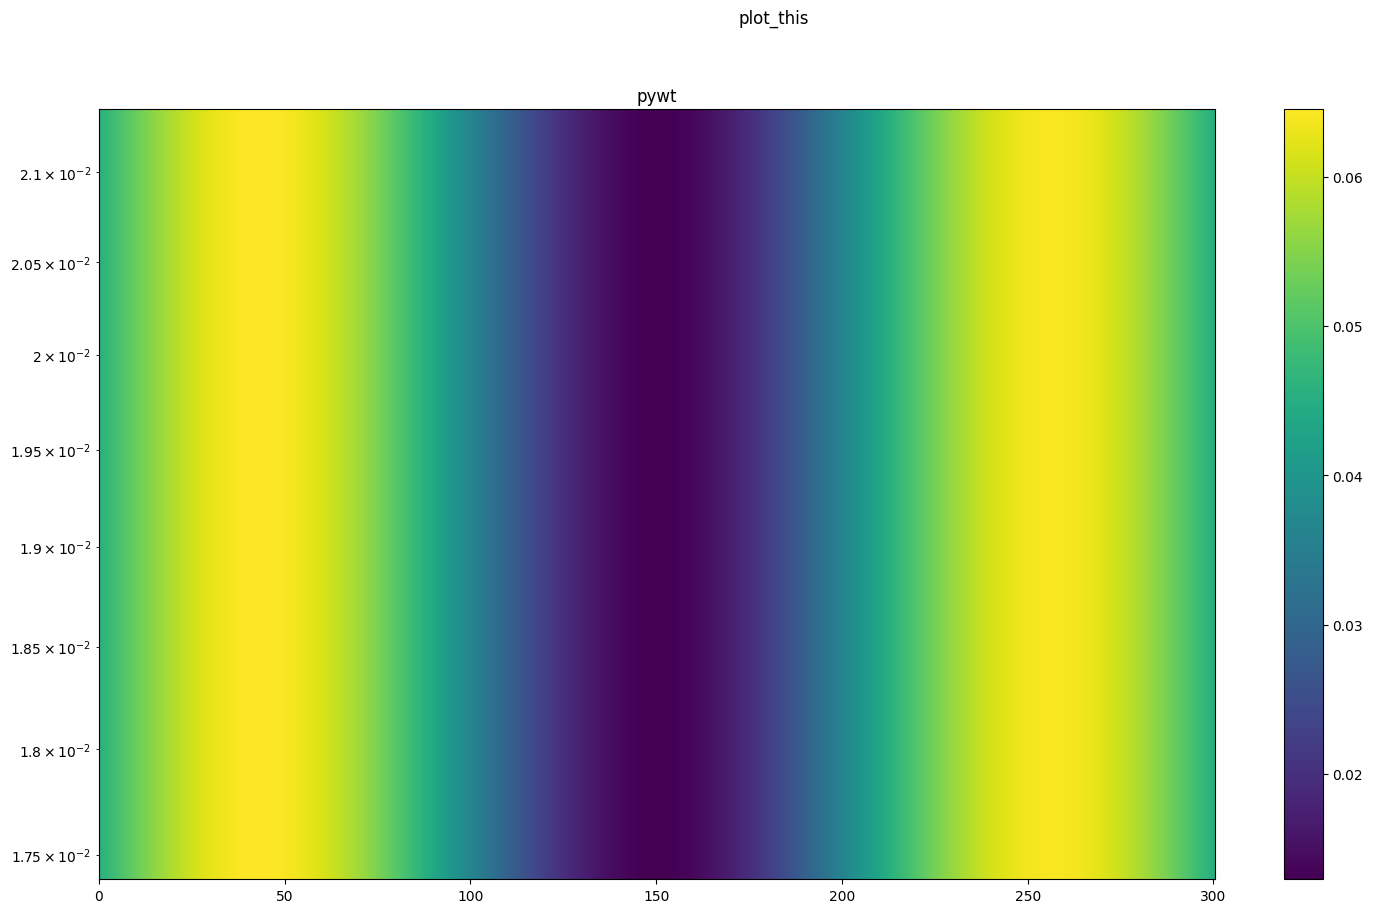

In [178]:
tracer['plot_this'] = tracer['S12'] ** 2 / (tracer['S1'] * tracer['S2'])
hypyp.plots.plot_coefs([tracer], 'plot_this', 'plot_this') 


pywt
[0.1        0.0989605  0.0979318  0.09691379 0.09590637 0.09490942
 0.09392283 0.09294649 0.09198031 0.09102417 0.09007797 0.08914161
 0.08821497 0.08729798 0.08639051 0.08549248 0.08460378 0.08372432
 0.082854   0.08199273 0.08114041 0.08029695 0.07946226 0.07863624
 0.07781882 0.07700989 0.07620937 0.07541716 0.0746332  0.07385738
 0.07308963 0.07232986 0.07157799 0.07083393 0.07009761 0.06936894
 0.06864785 0.06793425 0.06722807 0.06652923 0.06583766 0.06515327
 0.064476   0.06380577 0.06314251 0.06248614 0.06183659 0.0611938
 0.06055768 0.05992818 0.05930523 0.05868875 0.05807867 0.05747494
 0.05687749 0.05628624 0.05570115 0.05512213 0.05454913 0.05398209
 0.05342094 0.05286563 0.05231609 0.05177226 0.05123409 0.05070151
 0.05017446 0.0496529  0.04913675 0.04862597 0.0481205  0.04762029
 0.04712527 0.0466354  0.04615063 0.04567089 0.04519614 0.04472632
 0.04426139 0.04380129 0.04334597 0.04289539 0.04244949 0.04200822
 0.04157155 0.04113941 0.04071176 0.04028856 0.03986976 0.

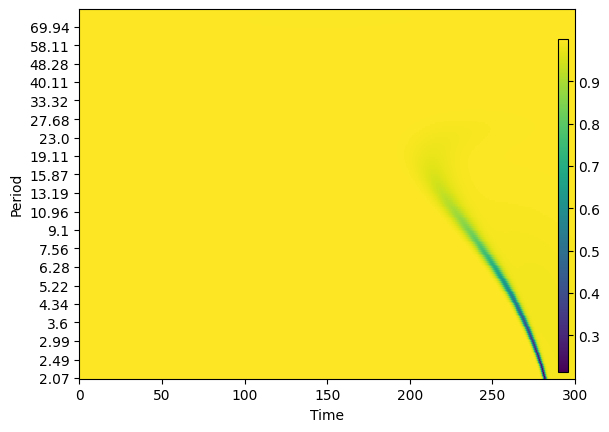

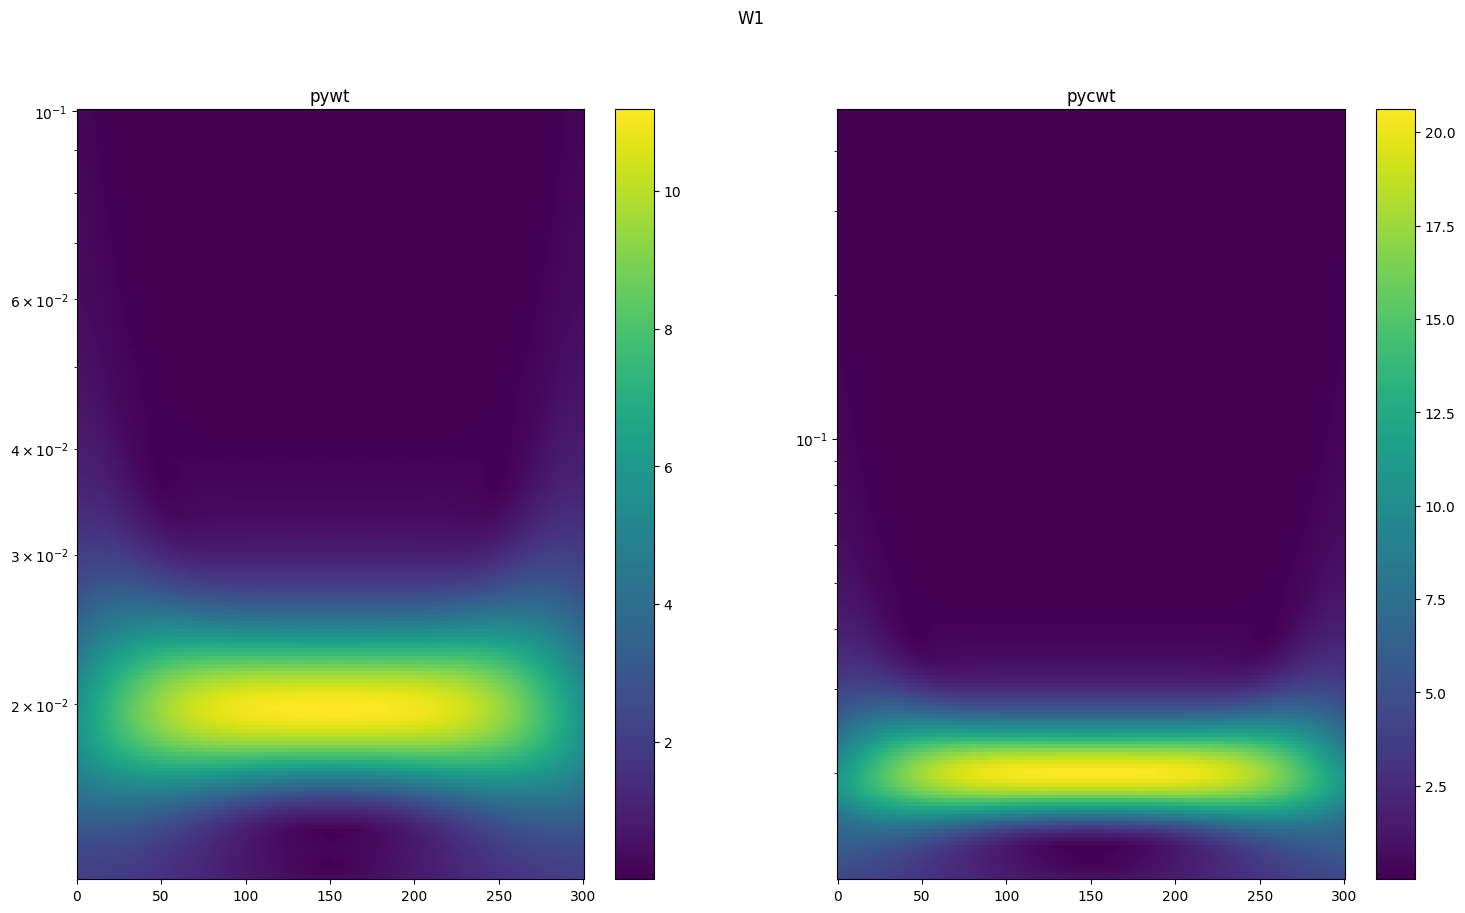

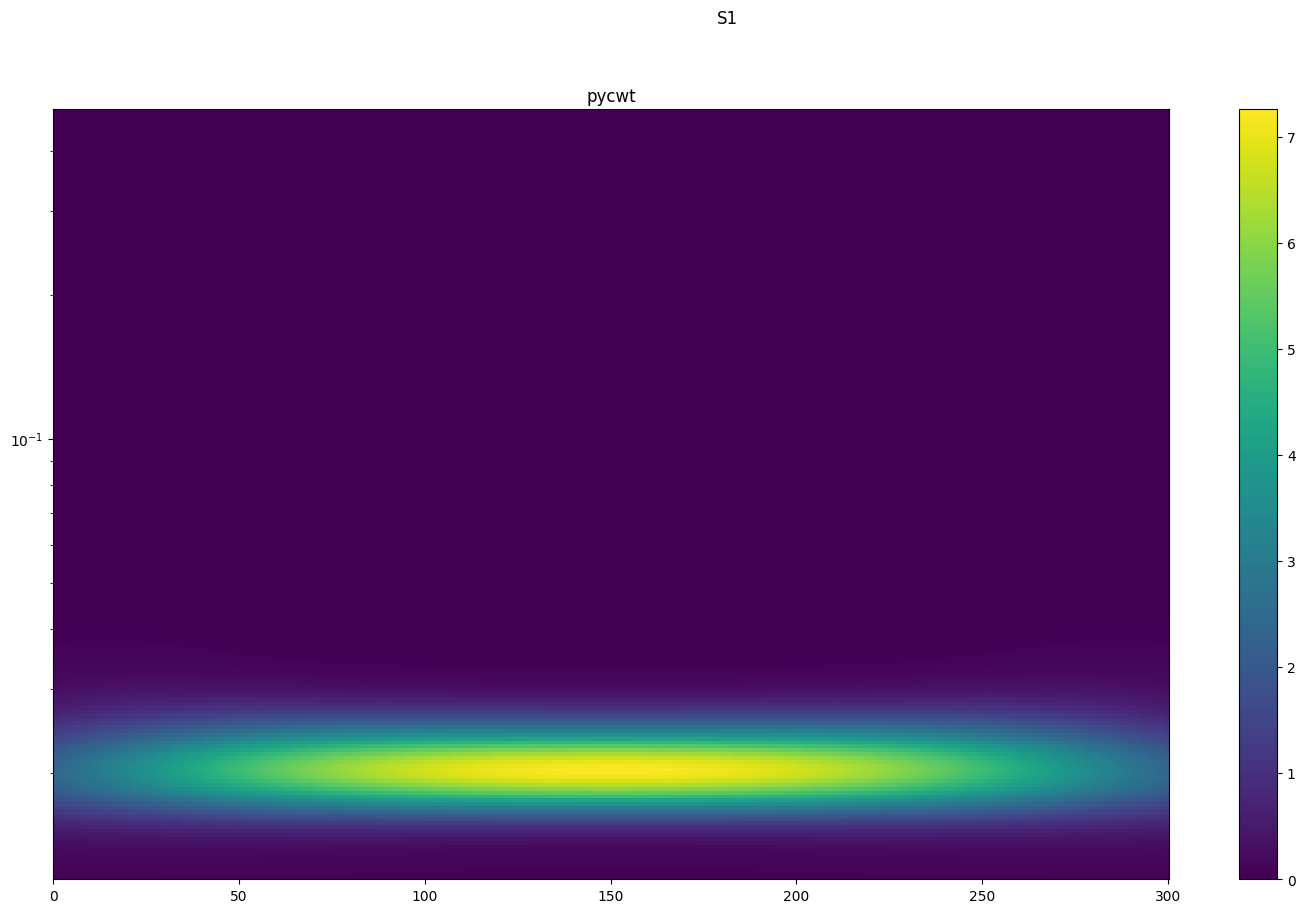

In [226]:
tracer_pywt = dict(name='pywt')
wct, times, fq, coif = xwt_coherence_morl(
    y1,
    y2,
    T,
    1/12,
    wavelet_name='cmor2-1',
    normalize=True,
    smoothing_params=dict(smooth_factor=-0.1),
    tracer=tracer_pywt
)

tracer_pycwt = dict(name='pycwt')
wct_pycwt, aWCT_pycwt, coi_pycwt, freqs_pycwt, significance_pycwt = pycwt.wct(y1, y2, dt=1/fs, sig=False, tracer=tracer_pycwt)

tracers = [tracer_pywt, tracer_pycwt]

spectrogram_plot_period(np.abs(wct_pycwt), times, freqs_pycwt, coif)

hypyp.plots.plot_coefs(tracers, 'W1', 'W1')
plt.show()



hypyp.plots.plot_coefs([tracer_pycwt], 'S1', 'S1')

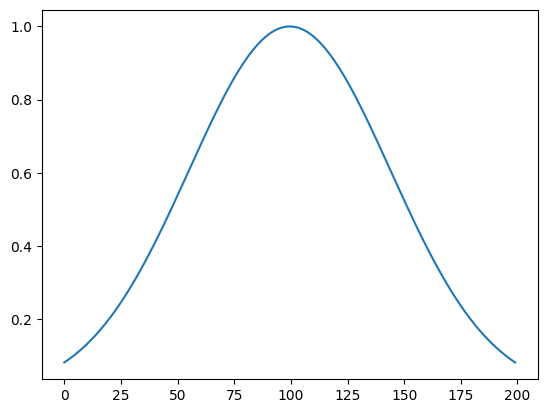

In [180]:
x = np.linspace(-5, 5, 200)
plt.plot(np.exp(-x **2 / 10))
